In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
from cellpose import utils, io, plot, models

In [2]:
files = [
    "/u/home/f/f7xiesnm/project-zipursky/data/CTb_tracing/MAX_ctb03_20x_slice1_fov1.tif"
]
filename = files[-1]

(512, 512)


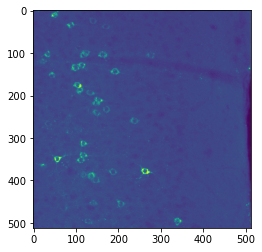

In [3]:
# view 1 image
img = io.imread(files[-1])
img_test = np.array(Image.fromarray(img[0]).resize((512,512)))
print(img_test.shape)
plt.imshow(img_test)

In [4]:
%%time

# RUN CELLPOSE

model = models.Cellpose(gpu=False, model_type='cyto')  # cyto or nuclei
channels = [[0,0]]
diameter = 15 # or None

# masks, flows, styles, diams = model.eval(np.expand_dims(img_test, axis=0), diameter=diameter, channels=channels)
masks, flows, styles, diams = model.eval(img_test, diameter=diameter, channels=channels)

# # save results so you can load in gui
# io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

# # save results as png
io.save_to_png(img, masks, flows, filename)


CPU times: user 12.2 s, sys: 7.78 s, total: 20 s
Wall time: 20 s


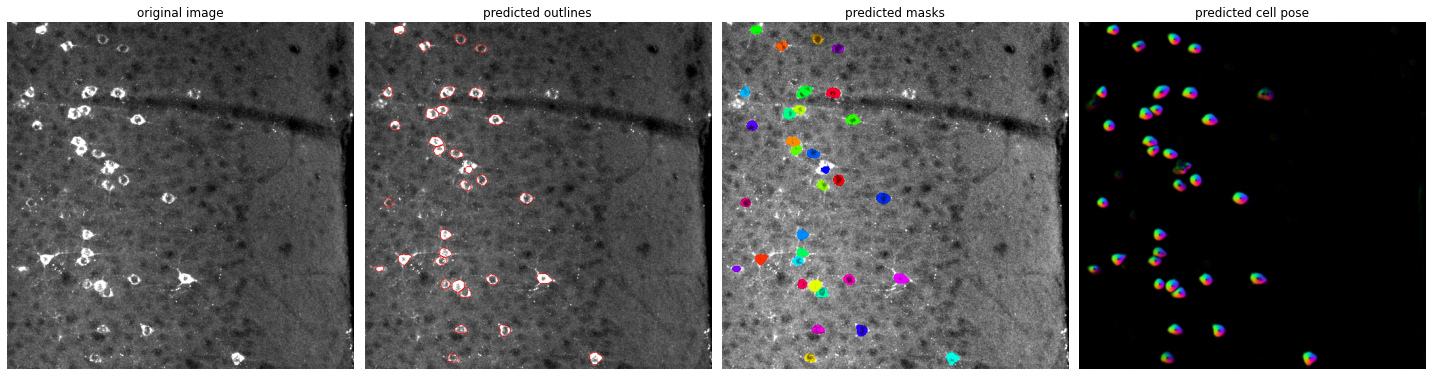

In [5]:
fig = plt.figure(figsize=(20,10))
plot.show_segmentation(fig, img_test, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()